<AxesSubplot:>

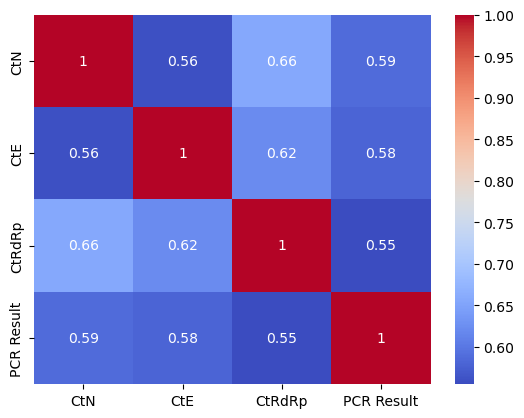

In [4]:
import pandas as pd
import seaborn as sns

# Step 1: Merge all CSV files into a single data frame
df = pd.concat([pd.read_csv("Aundh.csv"), pd.read_csv("Baner.csv"),pd.read_csv("Chinchwad.csv")])
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
# Step 2: Preprocess the data

df.drop(["Sr. No", "Sample ID", "Unnamed: 2", "Kit used"], axis=1, inplace=True)
df.dropna(inplace=True)

# Step 3: Group the data by location and date
grouped_df = df.groupby(["Location", "Date"]).agg({"CtN": "mean", "CtE": "mean", "CtRdRp": "mean", "PCR Result": lambda x: sum(x=="Positive")})

# Step 4: Create a correlation matrix
corr_matrix = grouped_df.corr()

# Step 5: Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


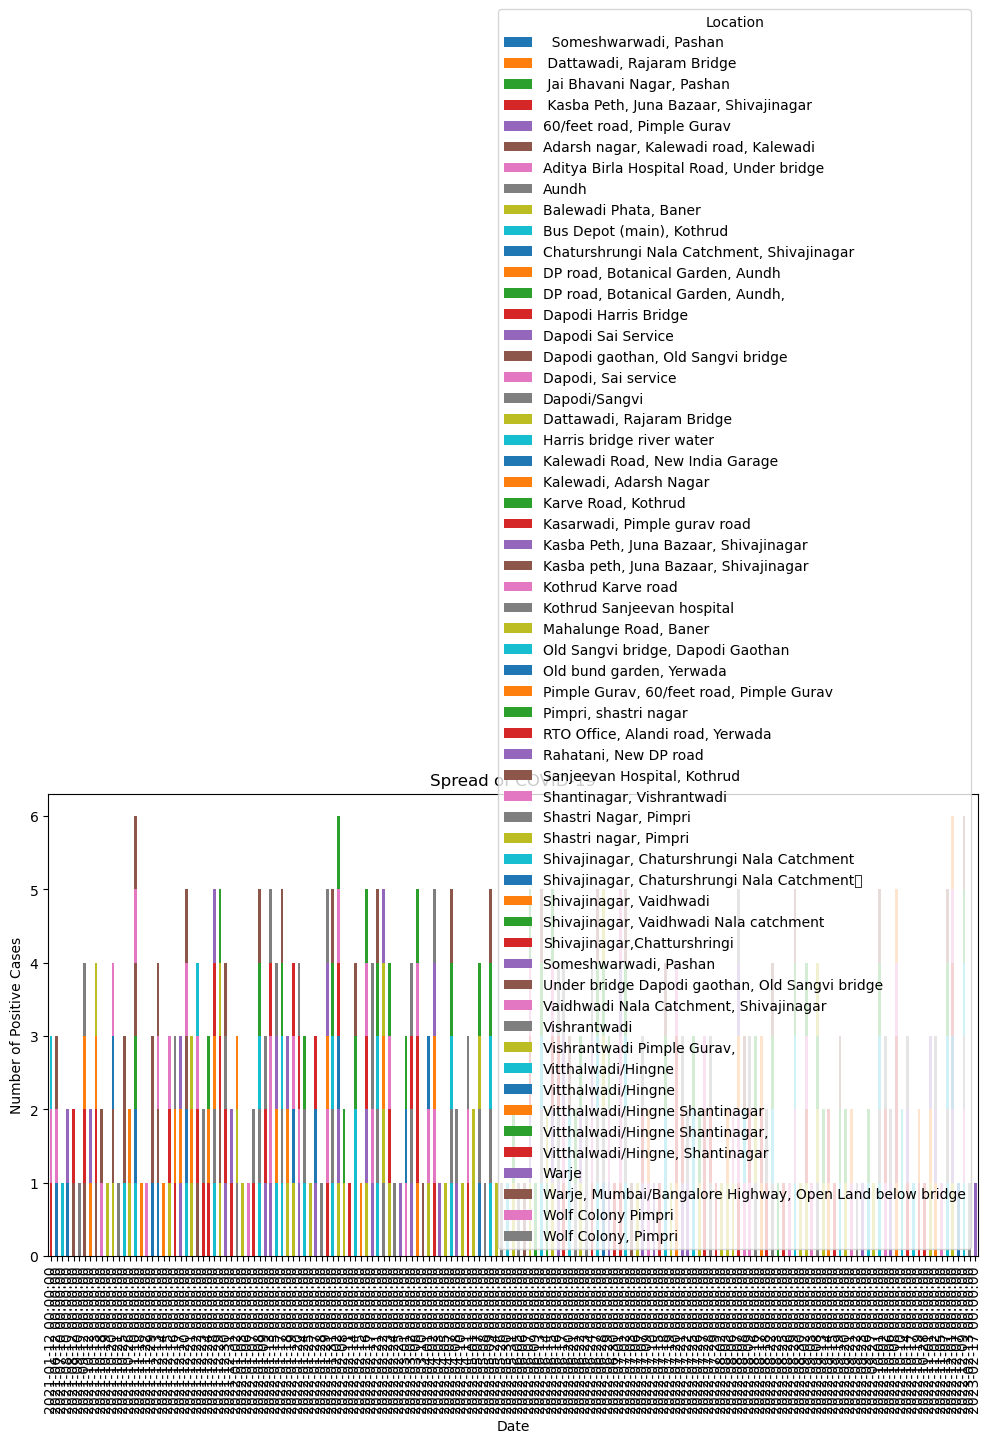

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("data2.csv")

# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Filter the data to include only positive cases
df_positive = df[df['PCR_Result'] == 'Positive']

# Group the data by date and location, and count the number of positive cases
df_positive_count = df_positive.groupby(['Date', 'Location'])['PCR_Result'].count().reset_index()
df_positive_count = df_positive_count.rename(columns={'PCR_Result': 'Count'})

# Pivot the data to create a table with dates as rows and locations as columns
df_pivot = df_positive_count.pivot(index='Date', columns='Location', values='Count')

# Plot the data using a stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12,6))

ax.set_xlabel('Date')
ax.set_ylabel('Number of Positive Cases')
ax.set_title('Spread of COVID-19')

plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


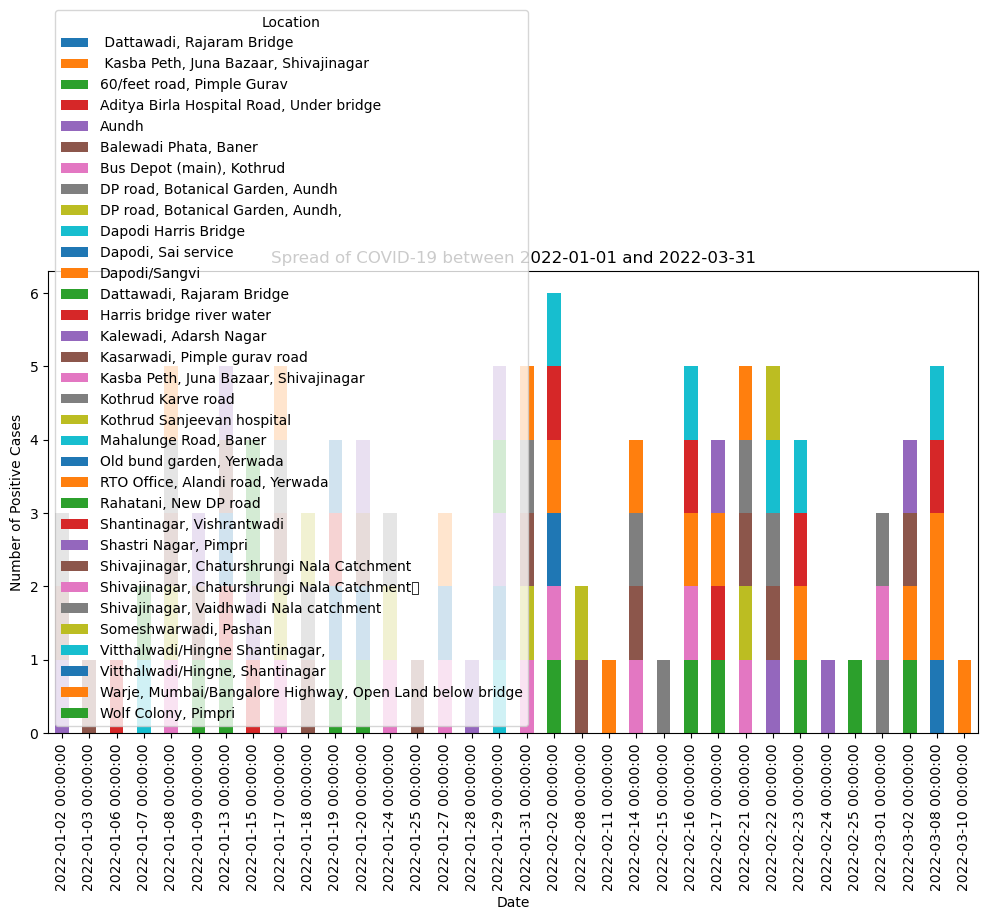

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("data2.csv")

# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set the start and end dates
start_date = '2022-01-01'
end_date = '2022-03-31'

# Filter the data to include only positive cases within the date range
df_positive = df[(df['PCR_Result'] == 'Positive') & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group the data by date and location, and count the number of positive cases
df_positive_count = df_positive.groupby(['Date', 'Location'])['PCR_Result'].count().reset_index()
df_positive_count = df_positive_count.rename(columns={'PCR_Result': 'Count'})

# Pivot the data to create a table with dates as rows and locations as columns
df_pivot = df_positive_count.pivot(index='Date', columns='Location', values='Count')

# Plot the data using a stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12,6))

ax.set_xlabel('Date')
ax.set_ylabel('Number of Positive Cases')
ax.set_title('Spread of COVID-19 between {} and {}'.format(start_date, end_date))

plt.show()
